In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('fifa_players.csv')

In [60]:
df['id'] = df.index
df.set_index('id', inplace=True)

In [61]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [62]:
df.drop(['name', 'full_name', 'birth_date'], axis=1, inplace=True)

In [63]:
# df.info()

In [64]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team',
       'national_rating', 'national_team_position', 'national_jersey_number',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

# Histogram

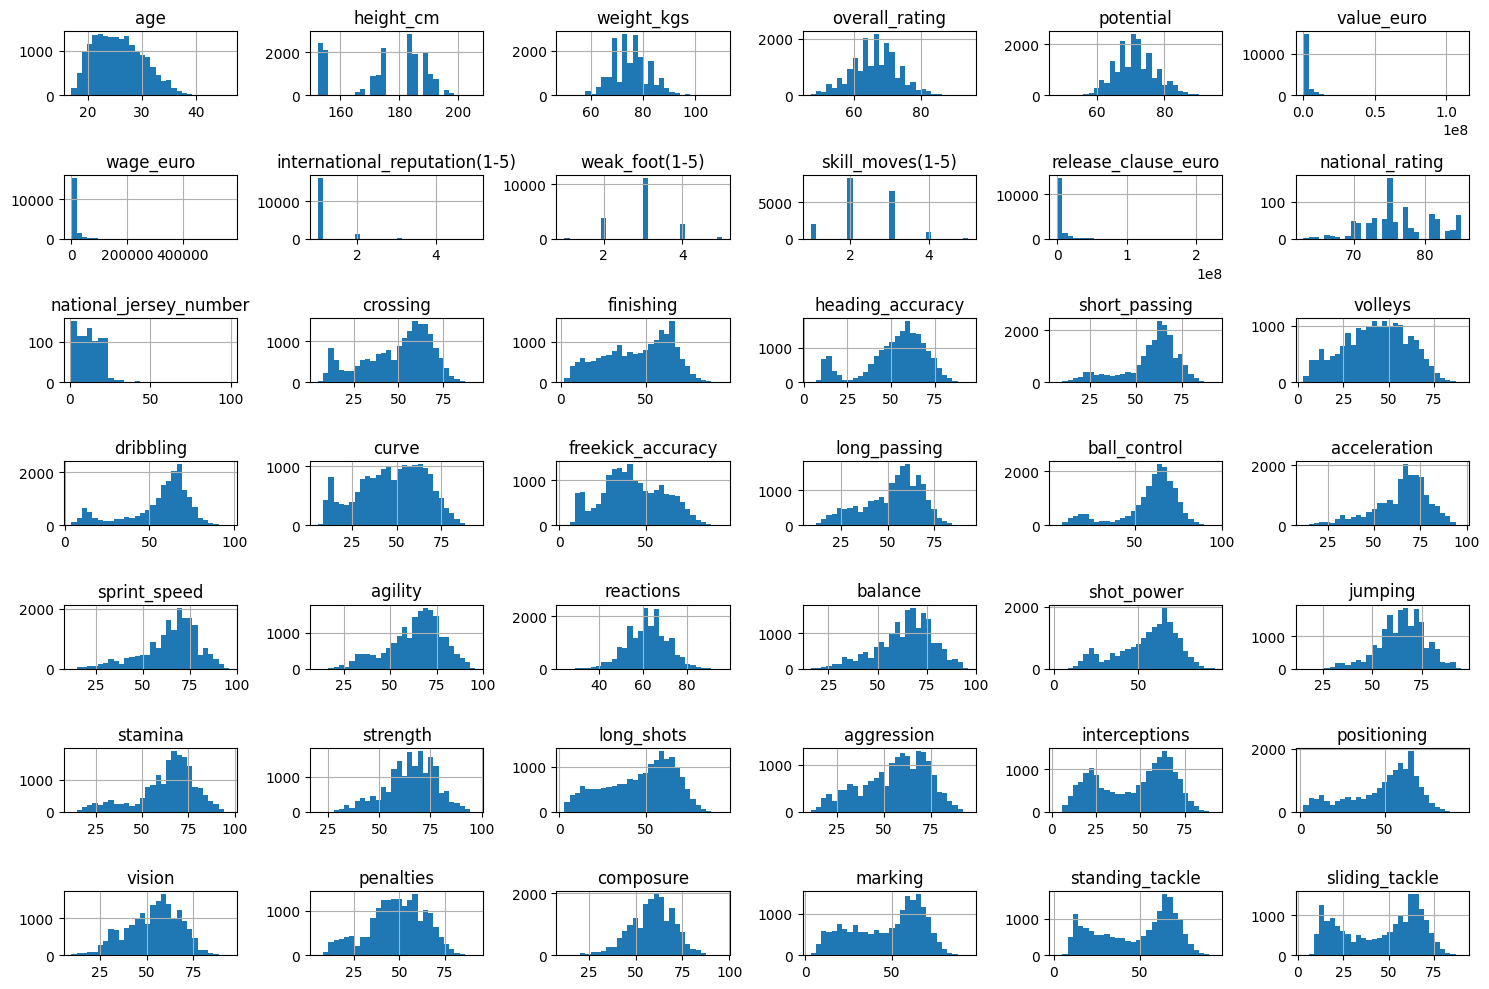

In [65]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

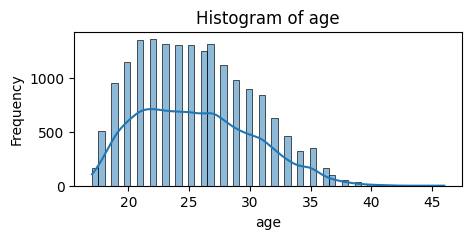

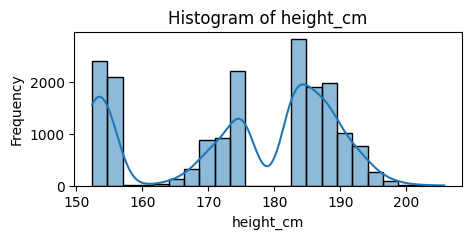

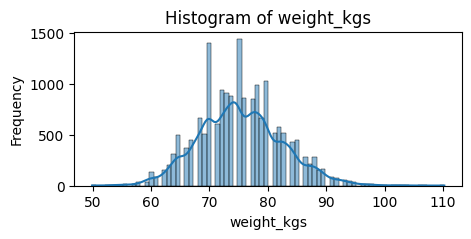

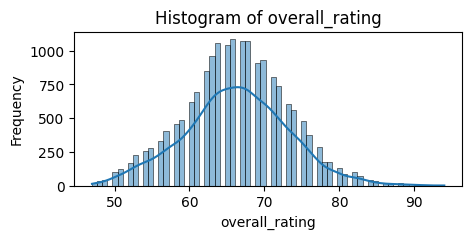

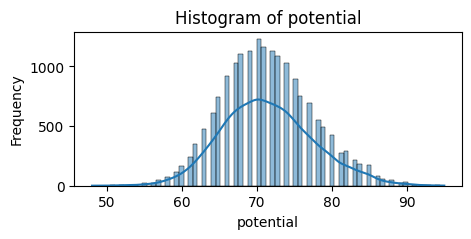

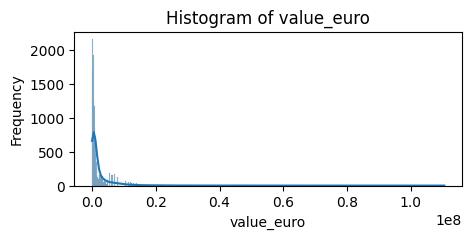

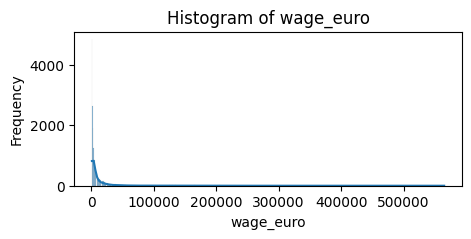

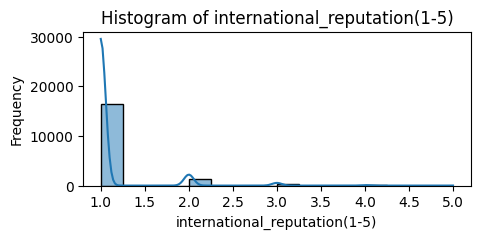

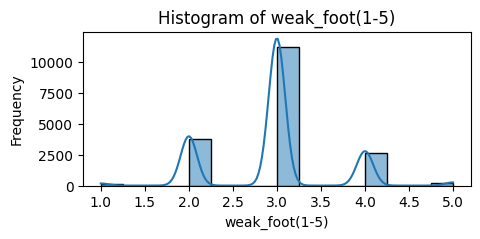

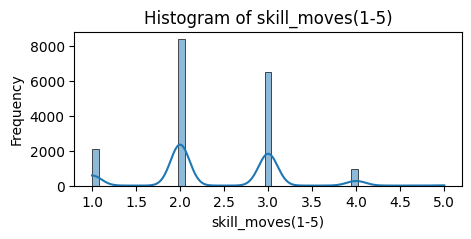

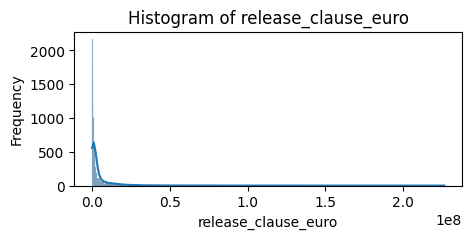

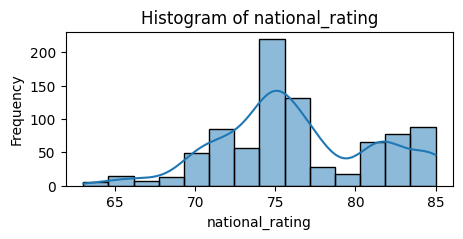

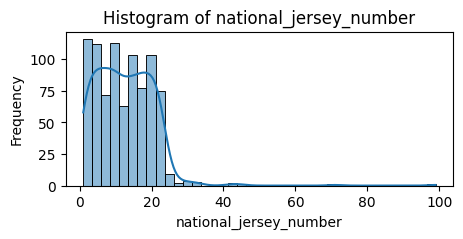

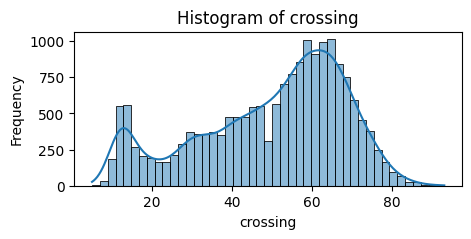

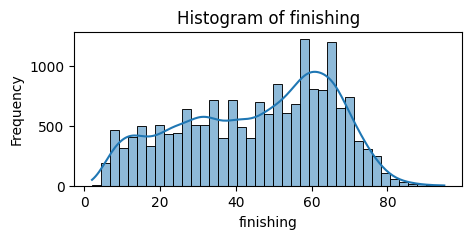

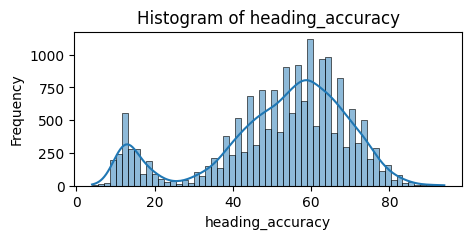

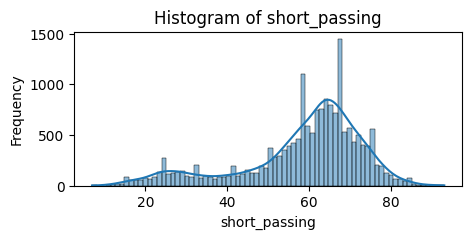

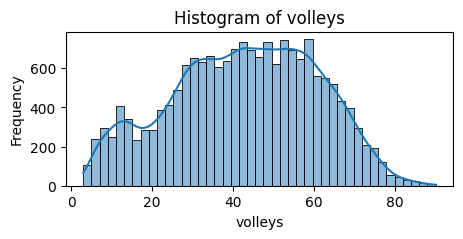

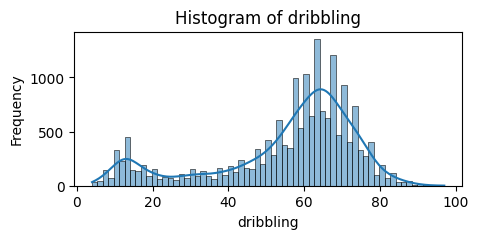

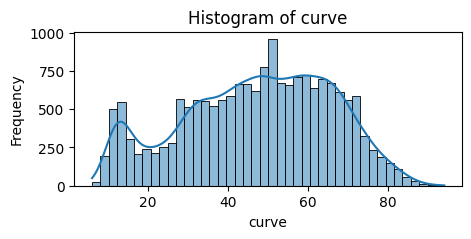

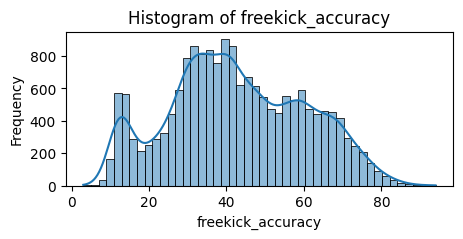

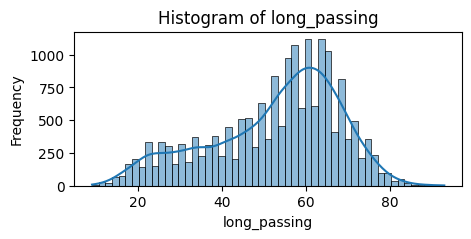

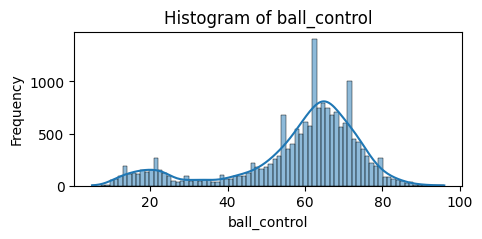

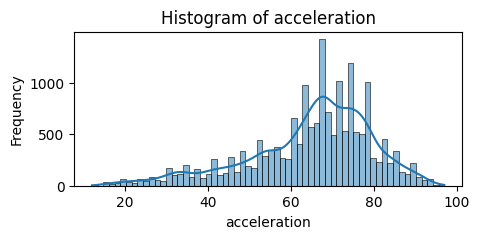

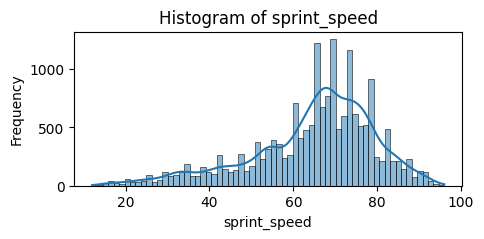

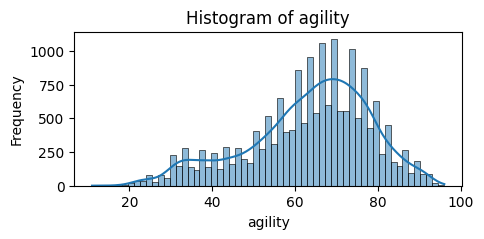

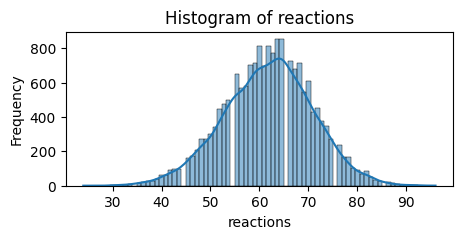

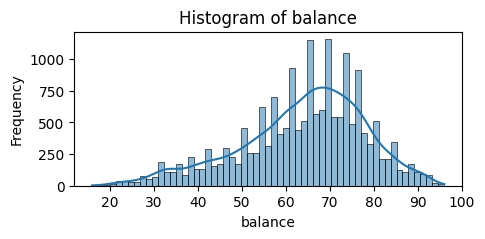

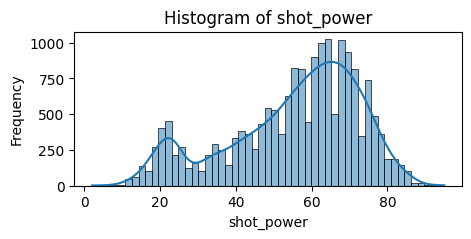

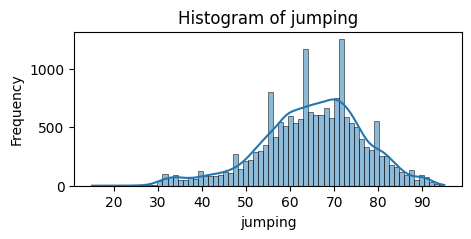

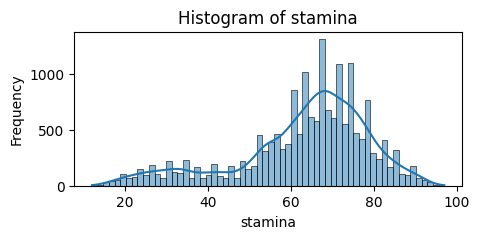

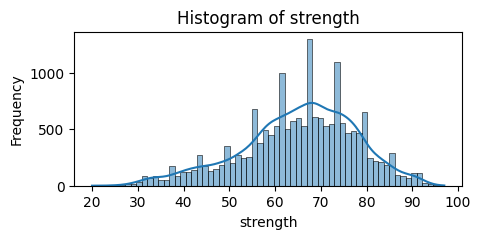

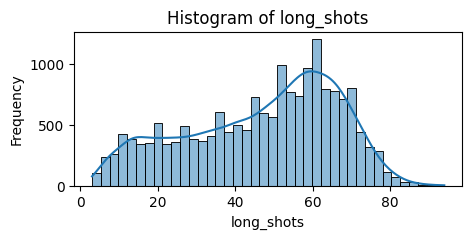

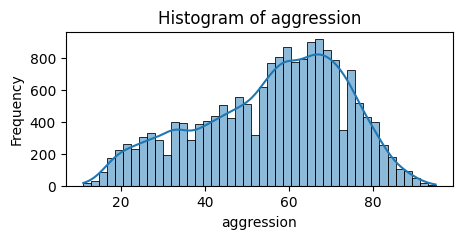

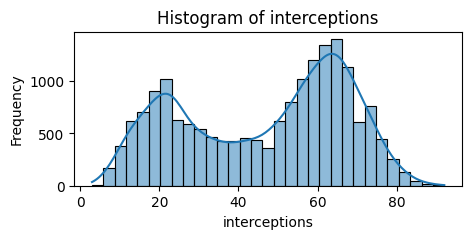

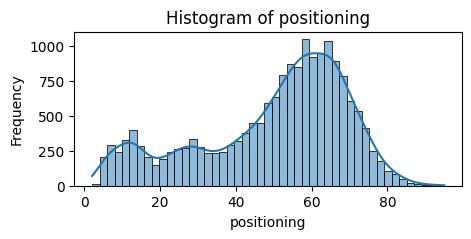

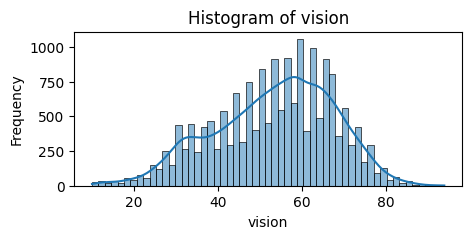

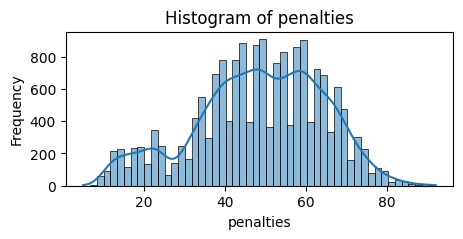

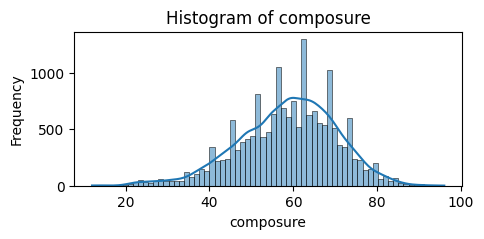

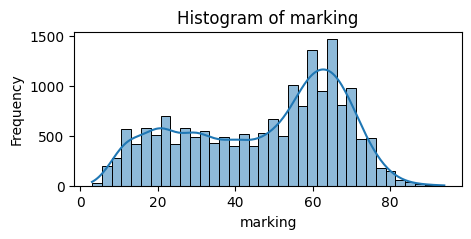

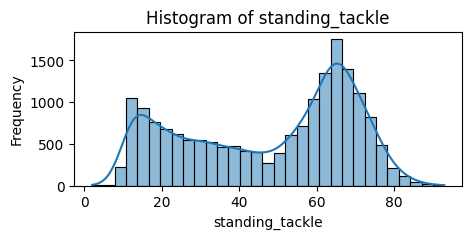

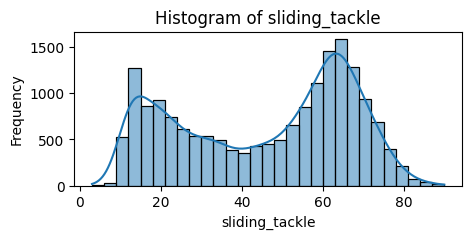

In [66]:
number_cols = df.select_dtypes(include=['number']).columns.tolist()

for col in number_cols:
    plt.figure(figsize=(5, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

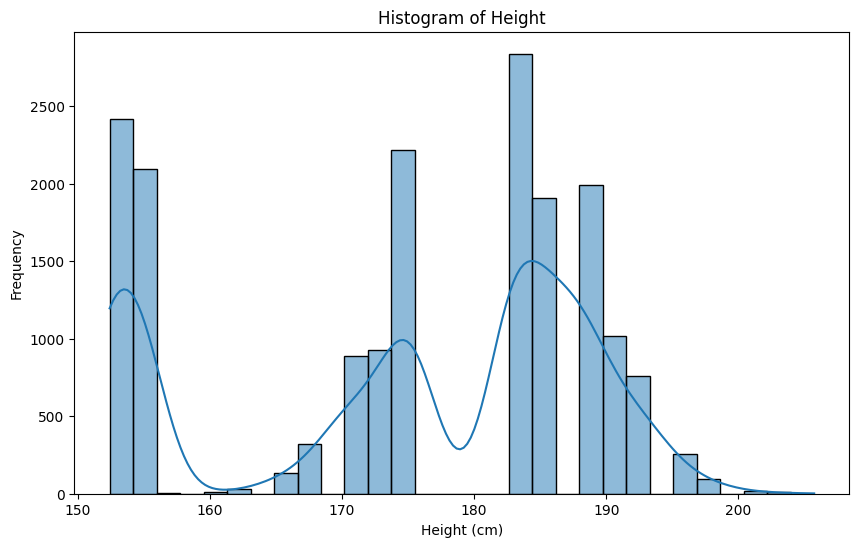

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['height_cm'], bins=30, kde=True)
plt.title('Histogram of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

In [68]:
df['height_cm'].describe()

count    17954.000000
mean       174.946921
std         14.029449
min        152.400000
25%        154.940000
50%        175.260000
75%        185.420000
max        205.740000
Name: height_cm, dtype: float64

In [69]:
#### Outliers

# Calculate the mean height for each position
mean_height_by_position = df[df['height_cm'] >= 160].groupby('positions')['height_cm'].mean()
mean_height_by_position
# # Function to replace height with mean height of positions
# def replace_height(row):
#     if row['height_cm'] < 160:
#         positions = row['positions'].split(',')
#         heights = [mean_height_by_position[pos] for pos in positions if pos in mean_height_by_position]
#         if heights:
#             return np.mean(heights)
#     return row['height_cm']

# # Apply the function to the dataframe
# df['height_cm'] = df.apply(replace_height, axis=1)

positions
CAM              174.869231
CAM,CDM          176.953333
CAM,CDM,CM       181.186667
CAM,CDM,CM,RM    175.260000
CAM,CDM,RM,CM    175.260000
                    ...    
ST,RW,LW         180.594000
ST,RW,LW,CAM     167.640000
ST,RW,LW,CF      182.880000
ST,RW,RM         185.420000
ST,RWB,RM        185.420000
Name: height_cm, Length: 738, dtype: float64

In [70]:
df['international_reputation(1-5)'].value_counts()

international_reputation(1-5)
1    16370
2     1226
3      301
4       51
5        6
Name: count, dtype: int64

# Handle missing values

In [71]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

value_euro                  255
wage_euro                   246
release_clause_euro        1837
national_team             17097
national_rating           17097
national_team_position    17097
national_jersey_number    17097
dtype: int64


In [72]:
missing_cols = missing_values.index.tolist()
missing_cols

['value_euro',
 'wage_euro',
 'release_clause_euro',
 'national_team',
 'national_rating',
 'national_team_position',
 'national_jersey_number']

In [73]:
df.drop(['national_team', 'national_rating', 'national_team_position',
         'national_jersey_number'], axis=1, inplace=True)

In [74]:
# df.head()

In [75]:
missing_cols = df.columns[df.isnull().any()].tolist()
for col in missing_cols:
    print(f'{col} HAS {df[col].isnull().sum()} missing values')


value_euro HAS 255 missing values
wage_euro HAS 246 missing values
release_clause_euro HAS 1837 missing values


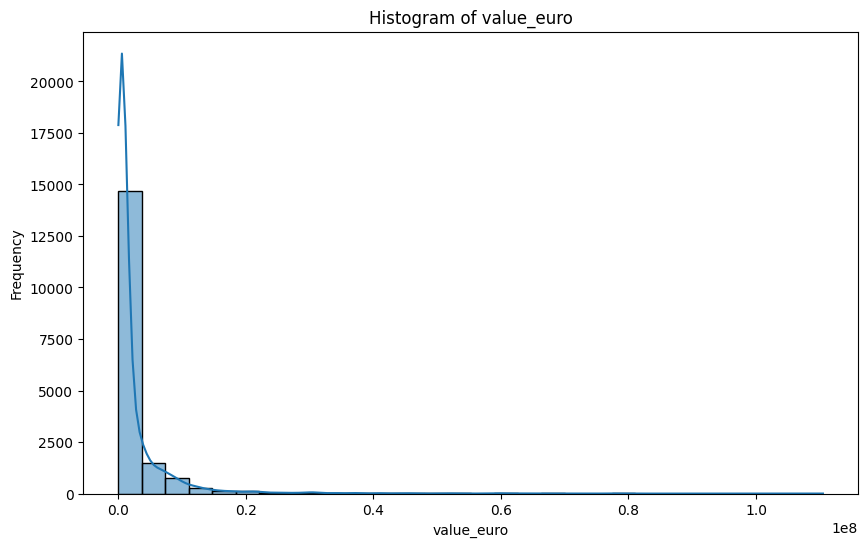

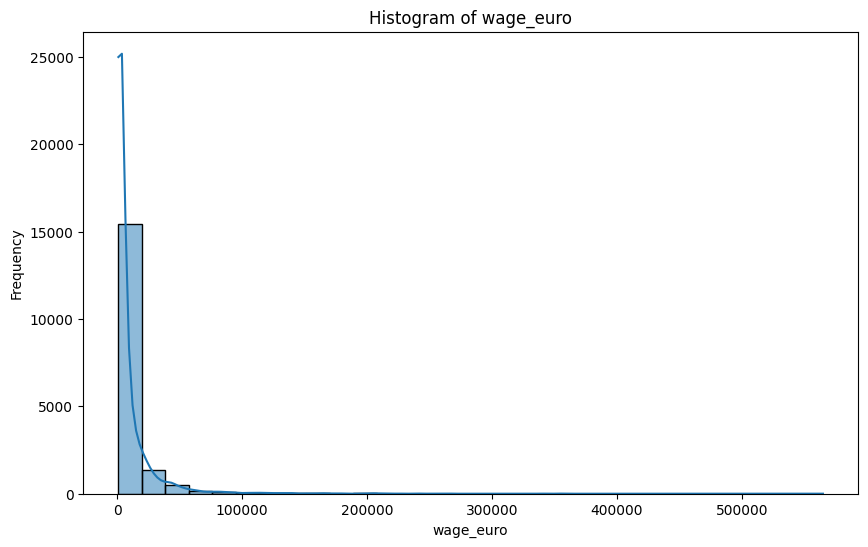

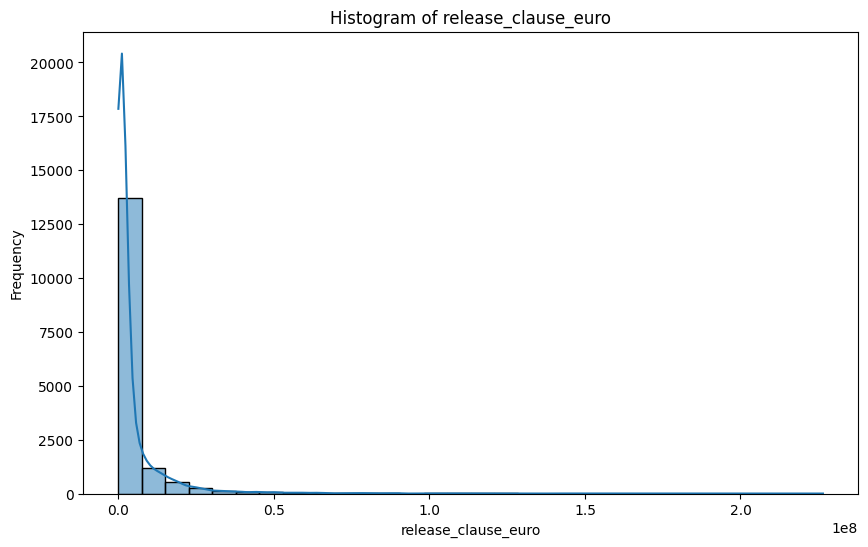

In [76]:
for col in missing_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Use MEDIAN to replace missing values 

In [77]:

for col in missing_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2572\3065688594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2572\3065688594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [78]:
len(df.columns[df.isnull().any()].tolist())

0

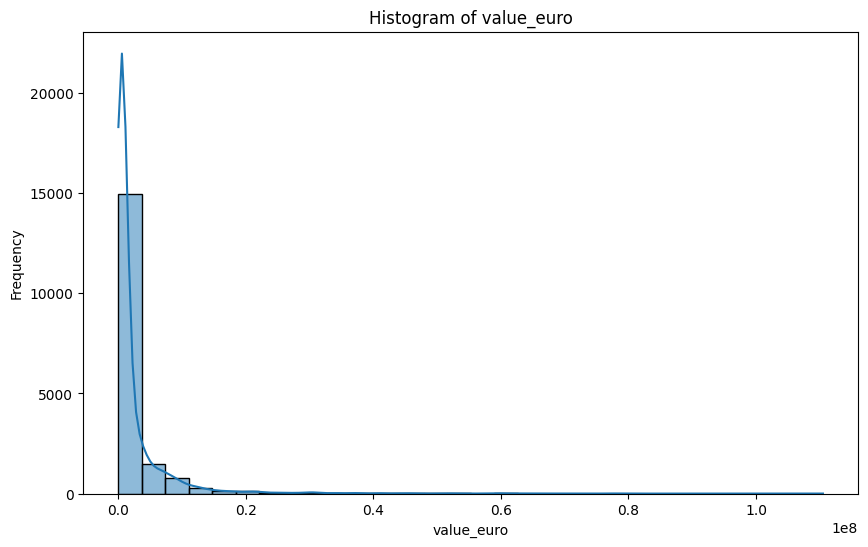

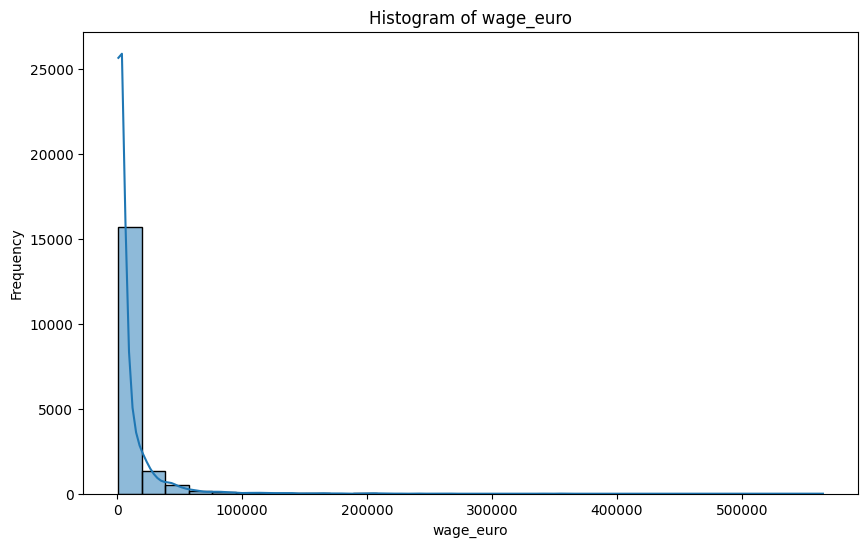

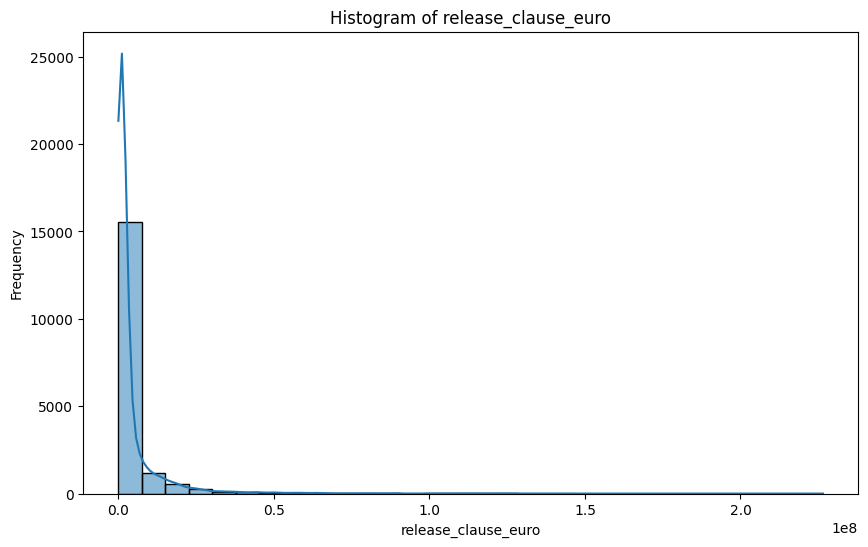

In [79]:
for col in missing_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Handle 'String' attributes

In [80]:
object_cols = df.select_dtypes(include='object').columns

object_cols

Index(['positions', 'nationality', 'preferred_foot', 'body_type'], dtype='object')

In [85]:
df['preferred_foot'].value_counts() # -> co the chuyen ve 0, 1

preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64

In [86]:
df['body_type'].value_counts()

body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

In [90]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [93]:
valid_body_types = ['Normal', 'Lean', 'Stocky']
df = df[df['body_type'].isin(valid_body_types)]

In [94]:
df['body_type'].value_counts()

body_type
Normal    10393
Lean       6468
Stocky     1086
Name: count, dtype: int64

In [97]:
df['nationality'].value_counts()

nationality
England                 1657
Germany                 1199
Spain                   1070
France                   925
Argentina                903
                        ... 
Kuwait                     1
New Caledonia              1
Oman                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64